In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Convert field names to dict for easy access.
# Can be hard coded 
# 
fields_path = '../../input/training_validation_2/fields.csv'  
fields_df = pd.read_csv(fields_path)
fields_df.columns = ['name', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6']

fields_dict = {}
fields_dictv2 = {}

for idx in range(fields_df.shape[0]):
    name = fields_df.loc[idx, 'name']

    _fields = []
    
    for f in fields_df.columns[1:]:
        if not (str(fields_df.loc[idx, f]) == 'nan'):
            _fields.append(name + "_" + str(fields_df.loc[idx, f]))
    
    fields_dict[idx] = {'name': fields_df.loc[idx, 'name'] , 'fields': _fields}
    fields_dictv2[name] = _fields
    
# fields_dict

In [3]:
feature_list = [fields_dict[21]['name']]
feature_list_regex= "|".join(["^"+f+"_" for f in feature_list])

feature_list

['FuseTestResult']

In [4]:
# import data
data_df_1 = pd.read_csv("../../data/training_validation_1.csv")
data_df_2 = pd.read_csv("../../data/training_validation_2.csv")
merged_df = pd.concat([data_df_1, data_df_2], axis=0) # Merge data frames


In [5]:
train_df = merged_df.filter(regex=feature_list_regex)
# train_df = train_df.filter(regex="vCnt|value")
# train_df = data_df_2.filter(regex="^Temperature")

In [6]:
train_df.head()

,FuseTestResult_vCnt,FuseTestResult_vFreq,FuseTestResult_vMax,FuseTestResult_vMin,FuseTestResult_vStd,FuseTestResult_vTrend,FuseTestResult_value
0,0,0.000000,NaN,NaN,NaN,NaN,NaN
1,2,0.198207,1.0,1.0,0.000000,0.0,1.000000
2,3,0.296778,1.0,1.0,0.000000,0.0,1.000000
3,3,0.298541,2.0,1.0,0.471405,0.0,1.666667
4,3,0.298554,2.0,1.0,0.471405,0.0,1.333333


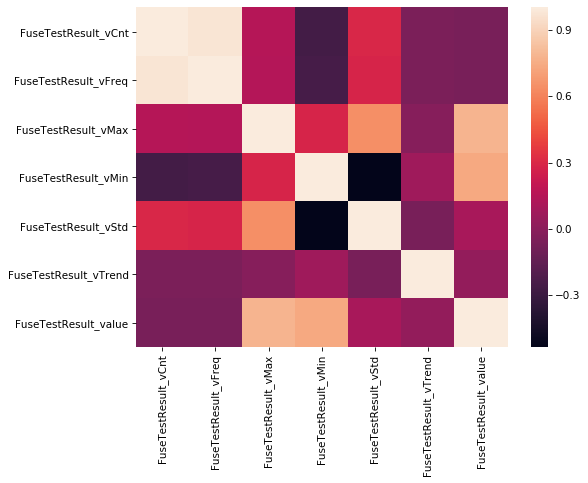

In [7]:
fig = plt.figure(figsize=(8,6), dpi=75)
sns.heatmap(train_df.corr(),annot=False)

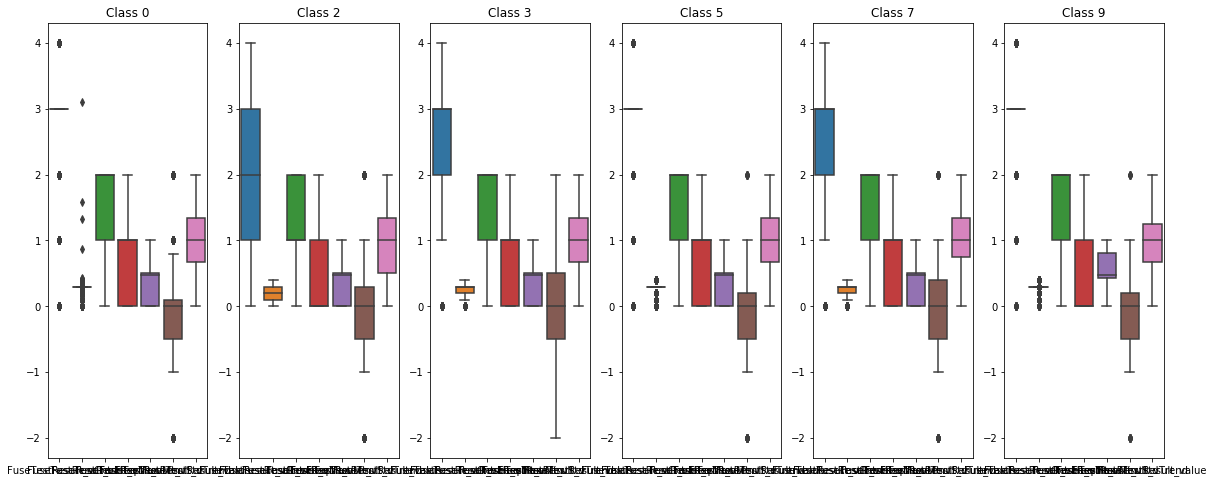

In [8]:
# fig = plt.figure(figsize=(10, 8), dpi=75)


classes = data_df_2['class'].unique()

fig, axes = plt.subplots(1, len(classes), sharex=True, figsize=(20,8))
# fig.suptitle('1 row x 2 columns axes with no data')

for idx, c in enumerate(classes):
    df = train_df[merged_df['class'] == c].copy()
#     df = train_df.copy()
    sns.boxplot(data=df, ax=axes[idx])
    axes[idx].set_title('Class '+str(c))


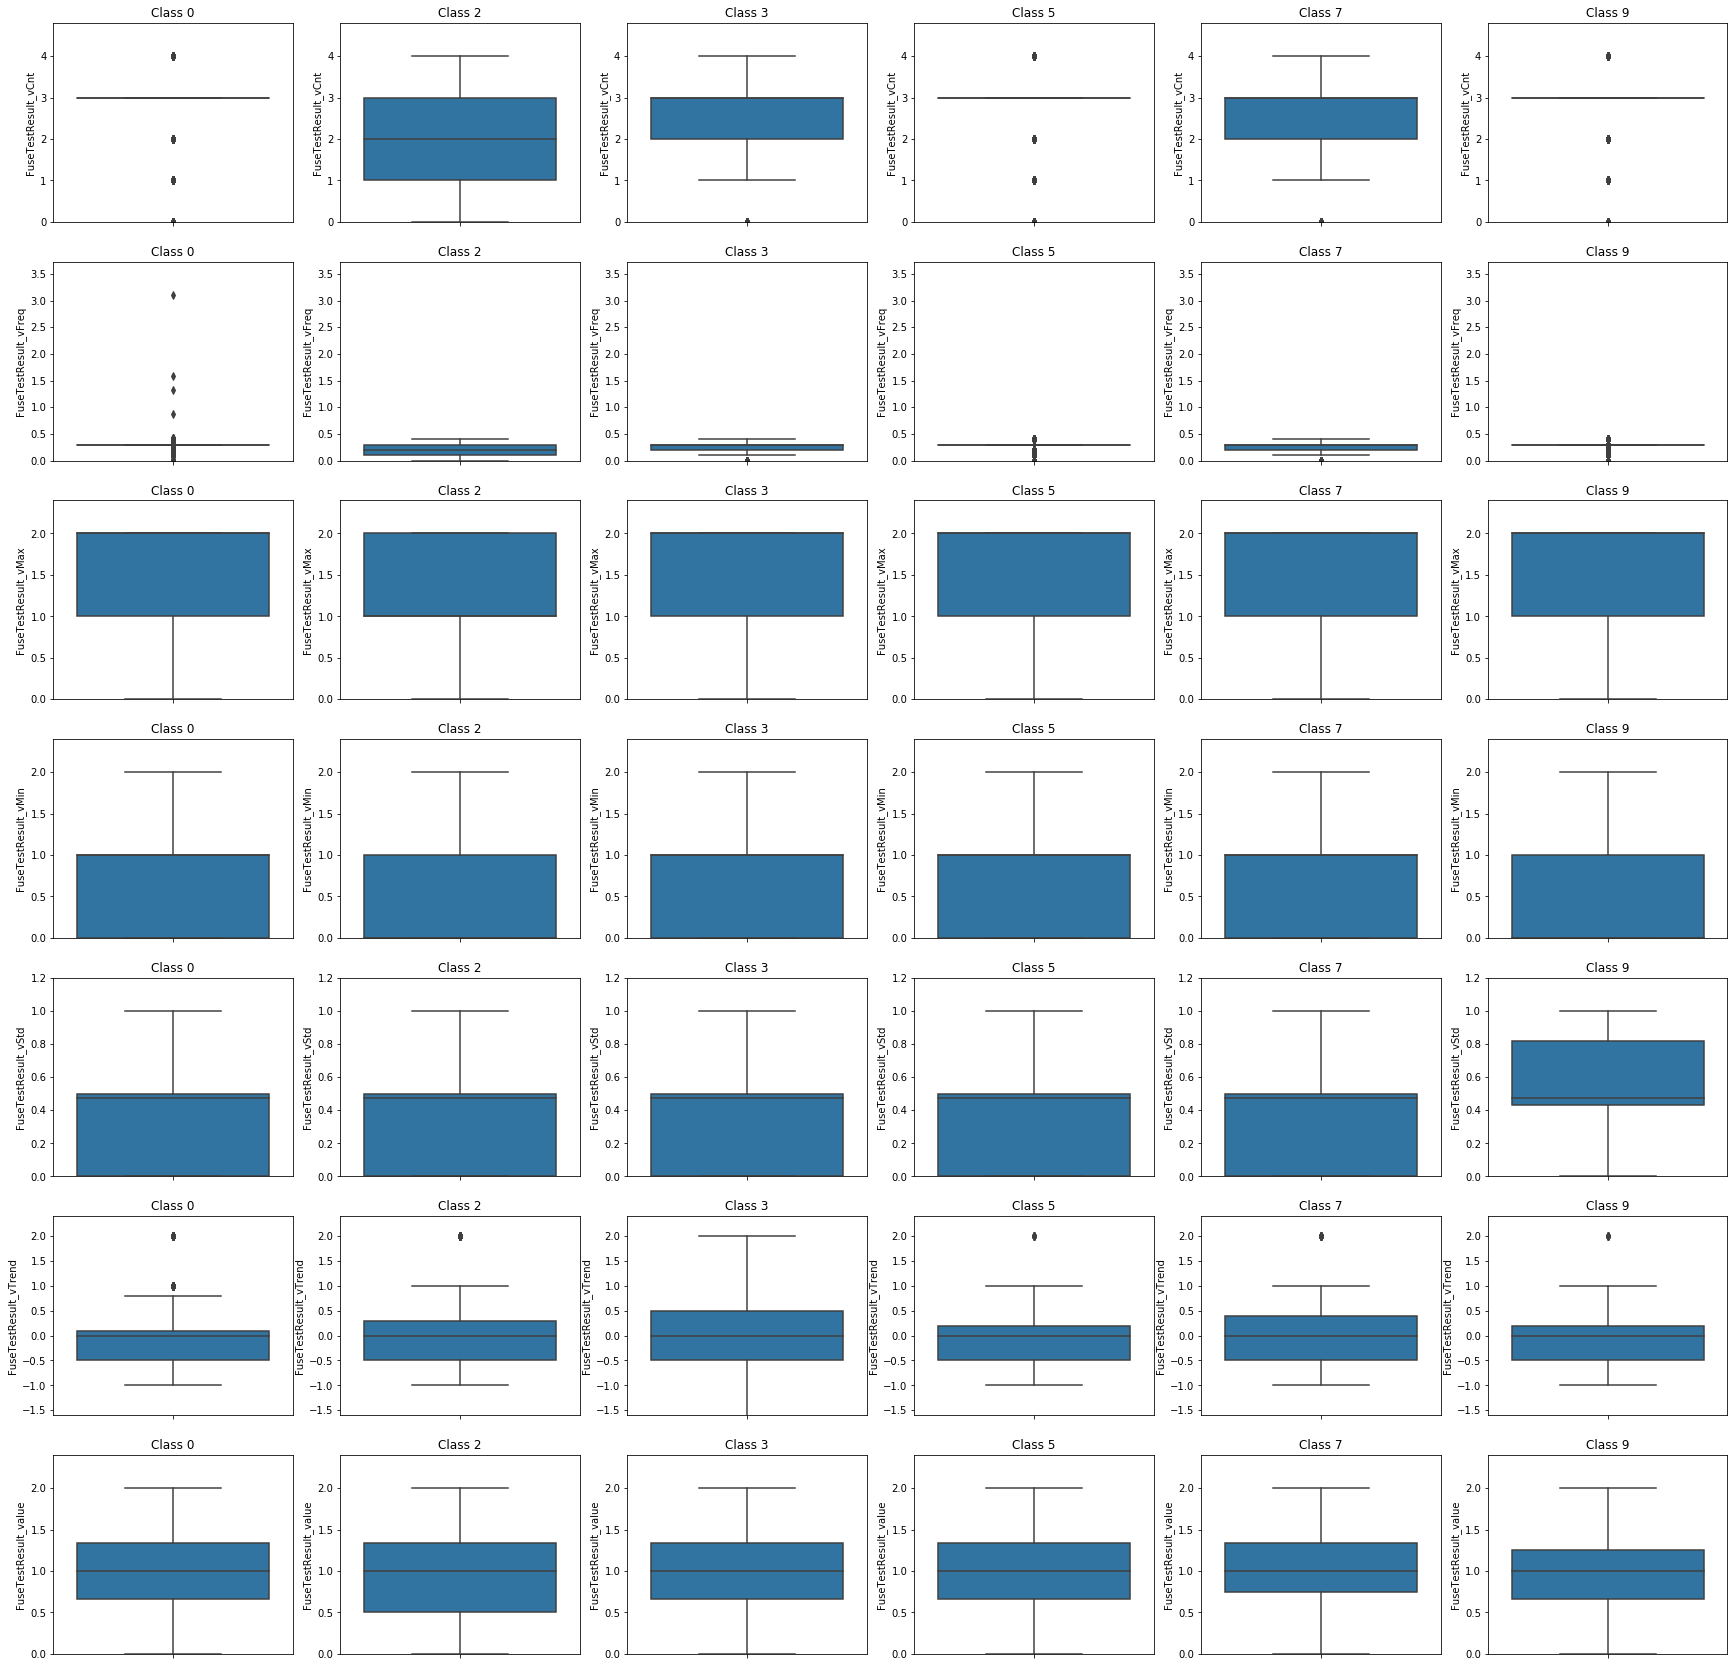

In [9]:
# fig = plt.figure(figsize=(10, 8), dpi=75)


classes = data_df_2['class'].unique()
features = train_df.columns

fig, axes = plt.subplots(len(features), len(classes), sharex=True, figsize=(30,30))
# print (axes)
# fig.suptitle('1 row x 2 columns axes with no data')

for idx1, f in enumerate(features):
    df = merged_df[[f, 'class']].copy()
    for idx2, c in enumerate(classes):
        df2 = df[df['class'] == c].copy()
#         print (f, c, df2.columns)
        sns.boxplot(y=df2[f], ax=axes[idx1, idx2])
        axes[idx1, idx2].set_title('Class '+str(c))
        axes[idx1, idx2].set_ylim(0.8*df[f].min(), 1.2*df[f].max())


In [10]:
# classes = data_df_2['class'].unique()
# features = train_df.columns

# fig, axes = plt.subplots(len(features), 1, sharex=True, figsize=(30,16))

# for idx1, f in enumerate(features):
#     df = data_df_2[[f, 'class']].copy()
#     axes[idx1].set_title('Feature '+str(f))
#     for idx2, c in enumerate(classes):
#         df2 = df[df['class'] == c].copy()
#         axes[idx1].boxplot(x=df2[f], positions=[idx2], labels=[c])
    


In [11]:
# train_df2 = pd.concat([data_df_2['class'], train_df], axis=1)
# axes = train_df2.groupby('class').boxplot(figsize=(20, 10))

In [12]:
classes = data_df_2['class'].unique()
features = train_df.columns

new_df = pd.DataFrame()

df_list = []

for idx1, f in enumerate(features):
    df = merged_df[[f, 'class']].copy()
    data = [[
        99, f, df[f].max(), df[f].min(), df[f].std(), df[f].mean(), df[f].median(), df[f].count(), df[f].isna().sum(),
        ]]

    data_df = pd.DataFrame(data)

    df_list.append(data_df)

    for idx2, c in enumerate(classes):
        df2 = df[df['class'] == c].copy()

        data = [[
            c, f, df2[f].max(), df2[f].min(), df2[f].std(), df2[f].mean(), df2[f].median(), df2[f].count(), df2[f].isna().sum(),
            ]]
        
        data_df = pd.DataFrame(data)
        df_list.append(data_df)
        
new_df = pd.concat(df_list, axis=0)
        
new_df.columns = ['class', 'feature', 'max', 'min', 'std', 'mean', 'median', 'Count', 'NA_count']

In [13]:
new_df[new_df['class']==99]

,class,feature,max,min,std,mean,median,Count,NA_count
0,99,FuseTestResult_vCnt,4.000000,0.0,0.753040,2.913938,3.000000,39611,0
0,99,FuseTestResult_vFreq,3.107494,0.0,0.076734,0.290124,0.298713,39611,0
0,99,FuseTestResult_vMax,2.000000,0.0,0.600988,1.485693,2.000000,39037,574
0,99,FuseTestResult_vMin,2.000000,0.0,0.551569,0.536978,1.000000,39037,574
0,99,FuseTestResult_vStd,1.000000,0.0,0.296999,0.426672,0.471405,39037,574
0,99,FuseTestResult_vTrend,2.000000,-2.0,0.530204,-0.037872,0.000000,37624,1987
0,99,FuseTestResult_value,2.000000,0.0,0.450750,1.006357,1.000000,39037,574


In [14]:
missing = 0

for c in classes:
    class_df = merged_df[merged_df['class']==c]
    runs = class_df['run'].unique()
    for r in runs:
        run_df = class_df[class_df['run'] == r]
        for f in features:
            f_df = run_df.filter([f]).copy().reset_index()
            del f_df['index']
            l = len(f_df)
            n_df = f_df[f_df[f].isna()]
#             if len(f_df) != len(n_df): print (c, r, f, len(f_df), len(n_df))
            if (len(n_df) == 0): continue
            missing += len(n_df)
            for i in list(n_df.index):
                if ((i == 0) | (i == l-1)): 
                    print ('NA at start or end')
                else:
                    print (c, r, f, len(f_df), list(n_df.index))
print (missing)

NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
0 11 FuseTestResult_vTrend 361 [0, 1, 360]
NA at start or end
NA at start or end
NA at start or end
0 17 FuseTestResult_vMax 362 [0, 1, 361]
NA at start or end
NA at start or end
0 17 FuseTestResult_vMin 362 [0, 1, 361]
NA at start or end
NA at start or end
0 17 FuseTestResult_vStd 362 [0, 1, 361]
NA at start or end
NA at start or end
0 17 FuseTestResult_vTrend 362 [0, 1, 75, 361]
0 17 FuseTestResult_vTrend 362 [0, 1, 75, 361]
NA at start or end
NA at start or end
0 17 FuseTestResult_value 362 [0, 1, 361]
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or

NA at start or end
NA at start or end
0 54 FuseTestResult_vTrend 1077 [0, 1, 617]
0 54 FuseTestResult_vTrend 1077 [0, 1, 617]
NA at start or end
NA at start or end
0 55 FuseTestResult_vMax 1078 [0, 1, 2]
0 55 FuseTestResult_vMax 1078 [0, 1, 2]
NA at start or end
0 55 FuseTestResult_vMin 1078 [0, 1, 2]
0 55 FuseTestResult_vMin 1078 [0, 1, 2]
NA at start or end
0 55 FuseTestResult_vStd 1078 [0, 1, 2]
0 55 FuseTestResult_vStd 1078 [0, 1, 2]
NA at start or end
0 55 FuseTestResult_vTrend 1078 [0, 1, 2, 3, 615]
0 55 FuseTestResult_vTrend 1078 [0, 1, 2, 3, 615]
0 55 FuseTestResult_vTrend 1078 [0, 1, 2, 3, 615]
0 55 FuseTestResult_vTrend 1078 [0, 1, 2, 3, 615]
NA at start or end
0 55 FuseTestResult_value 1078 [0, 1, 2]
0 55 FuseTestResult_value 1078 [0, 1, 2]
NA at start or end
0 56 FuseTestResult_vMax 1080 [0, 1, 2, 3]
0 56 FuseTestResult_vMax 1080 [0, 1, 2, 3]
0 56 FuseTestResult_vMax 1080 [0, 1, 2, 3]
NA at start or end
0 56 FuseTestResult_vMin 1080 [0, 1, 2, 3]
0 56 FuseTestResult_vMin 108

NA at start or end
NA at start or end
NA at start or end
0 77 FuseTestResult_vMax 360 [0, 13, 155, 327, 359]
0 77 FuseTestResult_vMax 360 [0, 13, 155, 327, 359]
0 77 FuseTestResult_vMax 360 [0, 13, 155, 327, 359]
NA at start or end
NA at start or end
0 77 FuseTestResult_vMin 360 [0, 13, 155, 327, 359]
0 77 FuseTestResult_vMin 360 [0, 13, 155, 327, 359]
0 77 FuseTestResult_vMin 360 [0, 13, 155, 327, 359]
NA at start or end
NA at start or end
0 77 FuseTestResult_vStd 360 [0, 13, 155, 327, 359]
0 77 FuseTestResult_vStd 360 [0, 13, 155, 327, 359]
0 77 FuseTestResult_vStd 360 [0, 13, 155, 327, 359]
NA at start or end
NA at start or end
0 77 FuseTestResult_vTrend 360 [0, 13, 14, 73, 95, 144, 147, 148, 155, 168, 169, 172, 197, 214, 226, 230, 256, 263, 265, 295, 316, 327, 335, 353, 356, 359]
0 77 FuseTestResult_vTrend 360 [0, 13, 14, 73, 95, 144, 147, 148, 155, 168, 169, 172, 197, 214, 226, 230, 256, 263, 265, 295, 316, 327, 335, 353, 356, 359]
0 77 FuseTestResult_vTrend 360 [0, 13, 14, 73, 95

NA at start or end
0 101 FuseTestResult_value 361 [0, 6, 67, 120, 123, 196, 201, 257, 281, 320, 360]
0 101 FuseTestResult_value 361 [0, 6, 67, 120, 123, 196, 201, 257, 281, 320, 360]
0 101 FuseTestResult_value 361 [0, 6, 67, 120, 123, 196, 201, 257, 281, 320, 360]
0 101 FuseTestResult_value 361 [0, 6, 67, 120, 123, 196, 201, 257, 281, 320, 360]
0 101 FuseTestResult_value 361 [0, 6, 67, 120, 123, 196, 201, 257, 281, 320, 360]
0 101 FuseTestResult_value 361 [0, 6, 67, 120, 123, 196, 201, 257, 281, 320, 360]
0 101 FuseTestResult_value 361 [0, 6, 67, 120, 123, 196, 201, 257, 281, 320, 360]
0 101 FuseTestResult_value 361 [0, 6, 67, 120, 123, 196, 201, 257, 281, 320, 360]
0 101 FuseTestResult_value 361 [0, 6, 67, 120, 123, 196, 201, 257, 281, 320, 360]
NA at start or end
NA at start or end
0 81 FuseTestResult_vMax 361 [0, 31, 360]
NA at start or end
NA at start or end
0 81 FuseTestResult_vMin 361 [0, 31, 360]
NA at start or end
NA at start or end
0 81 FuseTestResult_vStd 361 [0, 31, 360]
NA 

0 93 FuseTestResult_vMax 361 [12, 111, 142, 180, 202, 359, 360]
0 93 FuseTestResult_vMax 361 [12, 111, 142, 180, 202, 359, 360]
0 93 FuseTestResult_vMax 361 [12, 111, 142, 180, 202, 359, 360]
0 93 FuseTestResult_vMax 361 [12, 111, 142, 180, 202, 359, 360]
0 93 FuseTestResult_vMax 361 [12, 111, 142, 180, 202, 359, 360]
0 93 FuseTestResult_vMax 361 [12, 111, 142, 180, 202, 359, 360]
NA at start or end
0 93 FuseTestResult_vMin 361 [12, 111, 142, 180, 202, 359, 360]
0 93 FuseTestResult_vMin 361 [12, 111, 142, 180, 202, 359, 360]
0 93 FuseTestResult_vMin 361 [12, 111, 142, 180, 202, 359, 360]
0 93 FuseTestResult_vMin 361 [12, 111, 142, 180, 202, 359, 360]
0 93 FuseTestResult_vMin 361 [12, 111, 142, 180, 202, 359, 360]
0 93 FuseTestResult_vMin 361 [12, 111, 142, 180, 202, 359, 360]
NA at start or end
0 93 FuseTestResult_vStd 361 [12, 111, 142, 180, 202, 359, 360]
0 93 FuseTestResult_vStd 361 [12, 111, 142, 180, 202, 359, 360]
0 93 FuseTestResult_vStd 361 [12, 111, 142, 180, 202, 359, 360]
0 

0 96 FuseTestResult_vStd 359 [0, 33, 168, 196, 284, 323, 357, 358]
0 96 FuseTestResult_vStd 359 [0, 33, 168, 196, 284, 323, 357, 358]
NA at start or end
NA at start or end
0 96 FuseTestResult_vTrend 359 [0, 10, 21, 33, 38, 56, 62, 68, 69, 71, 85, 98, 100, 113, 118, 123, 124, 130, 144, 167, 168, 181, 192, 196, 200, 204, 216, 228, 230, 231, 238, 240, 245, 250, 279, 281, 284, 302, 309, 323, 336, 351, 357, 358]
0 96 FuseTestResult_vTrend 359 [0, 10, 21, 33, 38, 56, 62, 68, 69, 71, 85, 98, 100, 113, 118, 123, 124, 130, 144, 167, 168, 181, 192, 196, 200, 204, 216, 228, 230, 231, 238, 240, 245, 250, 279, 281, 284, 302, 309, 323, 336, 351, 357, 358]
0 96 FuseTestResult_vTrend 359 [0, 10, 21, 33, 38, 56, 62, 68, 69, 71, 85, 98, 100, 113, 118, 123, 124, 130, 144, 167, 168, 181, 192, 196, 200, 204, 216, 228, 230, 231, 238, 240, 245, 250, 279, 281, 284, 302, 309, 323, 336, 351, 357, 358]
0 96 FuseTestResult_vTrend 359 [0, 10, 21, 33, 38, 56, 62, 68, 69, 71, 85, 98, 100, 113, 118, 123, 124, 130, 14

NA at start or end
2 0 FuseTestResult_vMax 361 [0, 24, 45, 58, 60, 62, 63, 211, 230, 260, 300]
2 0 FuseTestResult_vMax 361 [0, 24, 45, 58, 60, 62, 63, 211, 230, 260, 300]
2 0 FuseTestResult_vMax 361 [0, 24, 45, 58, 60, 62, 63, 211, 230, 260, 300]
2 0 FuseTestResult_vMax 361 [0, 24, 45, 58, 60, 62, 63, 211, 230, 260, 300]
2 0 FuseTestResult_vMax 361 [0, 24, 45, 58, 60, 62, 63, 211, 230, 260, 300]
2 0 FuseTestResult_vMax 361 [0, 24, 45, 58, 60, 62, 63, 211, 230, 260, 300]
2 0 FuseTestResult_vMax 361 [0, 24, 45, 58, 60, 62, 63, 211, 230, 260, 300]
2 0 FuseTestResult_vMax 361 [0, 24, 45, 58, 60, 62, 63, 211, 230, 260, 300]
2 0 FuseTestResult_vMax 361 [0, 24, 45, 58, 60, 62, 63, 211, 230, 260, 300]
2 0 FuseTestResult_vMax 361 [0, 24, 45, 58, 60, 62, 63, 211, 230, 260, 300]
NA at start or end
2 0 FuseTestResult_vMin 361 [0, 24, 45, 58, 60, 62, 63, 211, 230, 260, 300]
2 0 FuseTestResult_vMin 361 [0, 24, 45, 58, 60, 62, 63, 211, 230, 260, 300]
2 0 FuseTestResult_vMin 361 [0, 24, 45, 58, 60, 62

2 2 FuseTestResult_vMin 1079 [0, 1, 2, 61, 118, 224, 247, 248, 250, 251, 323, 421, 429, 503, 594, 597, 598, 599, 601, 618, 627, 629, 657, 662, 663, 664, 665, 716, 720, 723, 773, 782, 836, 874, 893, 897, 900, 929, 986, 993, 1018, 1051, 1056, 1078]
2 2 FuseTestResult_vMin 1079 [0, 1, 2, 61, 118, 224, 247, 248, 250, 251, 323, 421, 429, 503, 594, 597, 598, 599, 601, 618, 627, 629, 657, 662, 663, 664, 665, 716, 720, 723, 773, 782, 836, 874, 893, 897, 900, 929, 986, 993, 1018, 1051, 1056, 1078]
2 2 FuseTestResult_vMin 1079 [0, 1, 2, 61, 118, 224, 247, 248, 250, 251, 323, 421, 429, 503, 594, 597, 598, 599, 601, 618, 627, 629, 657, 662, 663, 664, 665, 716, 720, 723, 773, 782, 836, 874, 893, 897, 900, 929, 986, 993, 1018, 1051, 1056, 1078]
2 2 FuseTestResult_vMin 1079 [0, 1, 2, 61, 118, 224, 247, 248, 250, 251, 323, 421, 429, 503, 594, 597, 598, 599, 601, 618, 627, 629, 657, 662, 663, 664, 665, 716, 720, 723, 773, 782, 836, 874, 893, 897, 900, 929, 986, 993, 1018, 1051, 1056, 1078]
2 2 FuseTest

2 2 FuseTestResult_vTrend 1079 [0, 1, 2, 20, 32, 43, 57, 60, 61, 63, 64, 86, 108, 109, 110, 112, 113, 117, 118, 119, 120, 134, 135, 138, 142, 144, 146, 219, 222, 224, 243, 247, 248, 250, 251, 252, 254, 270, 275, 276, 281, 313, 314, 318, 319, 321, 323, 401, 405, 420, 421, 423, 427, 429, 461, 464, 466, 467, 468, 470, 474, 476, 496, 499, 502, 503, 504, 522, 523, 524, 530, 531, 532, 564, 565, 568, 569, 587, 592, 594, 595, 597, 598, 599, 600, 601, 607, 617, 618, 621, 622, 625, 627, 629, 630, 633, 634, 649, 650, 652, 654, 657, 658, 660, 661, 662, 663, 664, 665, 681, 682, 684, 688, 689, 691, 692, 693, 696, 697, 712, 713, 716, 717, 718, 720, 721, 723, 735, 744, 745, 763, 766, 769, 773, 780, 782, 783, 784, 797, 800, 803, 805, 806, 809, 811, 812, 813, 831, 832, 834, 836, 838, 840, 841, 842, 843, 844, 847, 860, 868, 870, 872, 873, 874, 875, 876, 890, 891, 892, 893, 894, 896, 897, 899, 900, 901, 917, 918, 926, 928, 929, 930, 932, 949, 953, 955, 957, 958, 960, 962, 969, 981, 983, 984, 985, 986, 989

2 2 FuseTestResult_value 1079 [0, 1, 2, 61, 118, 224, 247, 248, 250, 251, 323, 421, 429, 503, 594, 597, 598, 599, 601, 618, 627, 629, 657, 662, 663, 664, 665, 716, 720, 723, 773, 782, 836, 874, 893, 897, 900, 929, 986, 993, 1018, 1051, 1056, 1078]
2 2 FuseTestResult_value 1079 [0, 1, 2, 61, 118, 224, 247, 248, 250, 251, 323, 421, 429, 503, 594, 597, 598, 599, 601, 618, 627, 629, 657, 662, 663, 664, 665, 716, 720, 723, 773, 782, 836, 874, 893, 897, 900, 929, 986, 993, 1018, 1051, 1056, 1078]
2 2 FuseTestResult_value 1079 [0, 1, 2, 61, 118, 224, 247, 248, 250, 251, 323, 421, 429, 503, 594, 597, 598, 599, 601, 618, 627, 629, 657, 662, 663, 664, 665, 716, 720, 723, 773, 782, 836, 874, 893, 897, 900, 929, 986, 993, 1018, 1051, 1056, 1078]
2 2 FuseTestResult_value 1079 [0, 1, 2, 61, 118, 224, 247, 248, 250, 251, 323, 421, 429, 503, 594, 597, 598, 599, 601, 618, 627, 629, 657, 662, 663, 664, 665, 716, 720, 723, 773, 782, 836, 874, 893, 897, 900, 929, 986, 993, 1018, 1051, 1056, 1078]
2 2 Fuse

2 3 FuseTestResult_vMax 1035 [0, 1, 2, 3, 33, 34, 38, 40, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 58, 59, 60, 61, 62, 64, 65, 66, 67, 72, 73, 74, 75, 76, 78, 115, 118, 120, 121, 123, 125, 126, 127, 130, 166, 169, 170, 171, 172, 177, 178, 179, 181, 183, 186, 188, 190, 192, 196, 197, 199, 205, 212, 214, 215, 216, 217, 218, 222, 223, 224, 225, 227, 276, 360, 367, 368, 370, 373, 374, 377, 380, 402, 403, 405, 409, 410, 413, 417, 450, 451, 455, 459, 460, 461, 468, 473, 525, 530, 536, 538, 539, 543, 567, 568, 569, 570, 572, 574, 576, 580, 582, 584, 585, 586, 588, 649, 651, 657, 661, 662, 665, 711, 712, 760, 762, 764, 771, 820, 823, 824, 887, 890, 892, 898, 899, 903, 905, 923, 926, 934, 974, 977, 1013, 1015, 1026, 1027, 1028, 1029, 1030, 1031, 1033]
2 3 FuseTestResult_vMax 1035 [0, 1, 2, 3, 33, 34, 38, 40, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 58, 59, 60, 61, 62, 64, 65, 66, 67, 72, 73, 74, 75, 76, 78, 115, 118, 120, 121, 123, 125, 126, 127, 130, 166, 169, 170, 171, 172, 177, 178, 17

2 3 FuseTestResult_vStd 1035 [0, 1, 2, 3, 33, 34, 38, 40, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 58, 59, 60, 61, 62, 64, 65, 66, 67, 72, 73, 74, 75, 76, 78, 115, 118, 120, 121, 123, 125, 126, 127, 130, 166, 169, 170, 171, 172, 177, 178, 179, 181, 183, 186, 188, 190, 192, 196, 197, 199, 205, 212, 214, 215, 216, 217, 218, 222, 223, 224, 225, 227, 276, 360, 367, 368, 370, 373, 374, 377, 380, 402, 403, 405, 409, 410, 413, 417, 450, 451, 455, 459, 460, 461, 468, 473, 525, 530, 536, 538, 539, 543, 567, 568, 569, 570, 572, 574, 576, 580, 582, 584, 585, 586, 588, 649, 651, 657, 661, 662, 665, 711, 712, 760, 762, 764, 771, 820, 823, 824, 887, 890, 892, 898, 899, 903, 905, 923, 926, 934, 974, 977, 1013, 1015, 1026, 1027, 1028, 1029, 1030, 1031, 1033]
2 3 FuseTestResult_vStd 1035 [0, 1, 2, 3, 33, 34, 38, 40, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 58, 59, 60, 61, 62, 64, 65, 66, 67, 72, 73, 74, 75, 76, 78, 115, 118, 120, 121, 123, 125, 126, 127, 130, 166, 169, 170, 171, 172, 177, 178, 17

2 3 FuseTestResult_vTrend 1035 [0, 1, 2, 3, 4, 6, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 40, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 71, 72, 73, 74, 75, 76, 78, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130, 131, 164, 166, 168, 169, 170, 171, 172, 173, 174, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 188, 189, 190, 191, 192, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205, 206, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 227, 276, 277, 279, 316, 359, 360, 361, 363, 367, 368, 370, 371, 373, 374, 375, 376, 377, 378, 379, 380, 395, 396, 402, 403, 404, 405, 409, 410, 412, 413, 414, 415, 416, 417, 450, 451, 453, 455, 457, 458, 459, 460, 461, 462, 464, 465, 467, 468, 470, 471, 473, 518, 519, 524, 525, 526, 527, 530, 531, 532, 533, 535, 536, 538, 539, 540, 541, 542, 543, 544, 545, 560, 561, 562, 564, 567, 568, 569, 570, 572, 574, 576, 578, 579, 580, 581,

2 3 FuseTestResult_vTrend 1035 [0, 1, 2, 3, 4, 6, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 40, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 71, 72, 73, 74, 75, 76, 78, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130, 131, 164, 166, 168, 169, 170, 171, 172, 173, 174, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 188, 189, 190, 191, 192, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205, 206, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 227, 276, 277, 279, 316, 359, 360, 361, 363, 367, 368, 370, 371, 373, 374, 375, 376, 377, 378, 379, 380, 395, 396, 402, 403, 404, 405, 409, 410, 412, 413, 414, 415, 416, 417, 450, 451, 453, 455, 457, 458, 459, 460, 461, 462, 464, 465, 467, 468, 470, 471, 473, 518, 519, 524, 525, 526, 527, 530, 531, 532, 533, 535, 536, 538, 539, 540, 541, 542, 543, 544, 545, 560, 561, 562, 564, 567, 568, 569, 570, 572, 574, 576, 578, 579, 580, 581,

2 3 FuseTestResult_value 1035 [0, 1, 2, 3, 33, 34, 38, 40, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 58, 59, 60, 61, 62, 64, 65, 66, 67, 72, 73, 74, 75, 76, 78, 115, 118, 120, 121, 123, 125, 126, 127, 130, 166, 169, 170, 171, 172, 177, 178, 179, 181, 183, 186, 188, 190, 192, 196, 197, 199, 205, 212, 214, 215, 216, 217, 218, 222, 223, 224, 225, 227, 276, 360, 367, 368, 370, 373, 374, 377, 380, 402, 403, 405, 409, 410, 413, 417, 450, 451, 455, 459, 460, 461, 468, 473, 525, 530, 536, 538, 539, 543, 567, 568, 569, 570, 572, 574, 576, 580, 582, 584, 585, 586, 588, 649, 651, 657, 661, 662, 665, 711, 712, 760, 762, 764, 771, 820, 823, 824, 887, 890, 892, 898, 899, 903, 905, 923, 926, 934, 974, 977, 1013, 1015, 1026, 1027, 1028, 1029, 1030, 1031, 1033]
2 3 FuseTestResult_value 1035 [0, 1, 2, 3, 33, 34, 38, 40, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 58, 59, 60, 61, 62, 64, 65, 66, 67, 72, 73, 74, 75, 76, 78, 115, 118, 120, 121, 123, 125, 126, 127, 130, 166, 169, 170, 171, 172, 177, 178, 

2 3 FuseTestResult_value 1035 [0, 1, 2, 3, 33, 34, 38, 40, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 58, 59, 60, 61, 62, 64, 65, 66, 67, 72, 73, 74, 75, 76, 78, 115, 118, 120, 121, 123, 125, 126, 127, 130, 166, 169, 170, 171, 172, 177, 178, 179, 181, 183, 186, 188, 190, 192, 196, 197, 199, 205, 212, 214, 215, 216, 217, 218, 222, 223, 224, 225, 227, 276, 360, 367, 368, 370, 373, 374, 377, 380, 402, 403, 405, 409, 410, 413, 417, 450, 451, 455, 459, 460, 461, 468, 473, 525, 530, 536, 538, 539, 543, 567, 568, 569, 570, 572, 574, 576, 580, 582, 584, 585, 586, 588, 649, 651, 657, 661, 662, 665, 711, 712, 760, 762, 764, 771, 820, 823, 824, 887, 890, 892, 898, 899, 903, 905, 923, 926, 934, 974, 977, 1013, 1015, 1026, 1027, 1028, 1029, 1030, 1031, 1033]
2 3 FuseTestResult_value 1035 [0, 1, 2, 3, 33, 34, 38, 40, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 58, 59, 60, 61, 62, 64, 65, 66, 67, 72, 73, 74, 75, 76, 78, 115, 118, 120, 121, 123, 125, 126, 127, 130, 166, 169, 170, 171, 172, 177, 178, 

2 4 FuseTestResult_vTrend 360 [0, 8, 11, 14, 16, 24, 75, 77, 79, 80, 83, 84, 86, 91, 92, 93, 94, 95, 97, 98, 99, 105, 106, 107, 116, 117, 119, 121, 123, 125, 127, 129, 130, 133, 134, 136, 138, 139, 140, 141, 142, 157, 159, 161, 165, 167, 169, 173, 184, 186, 189, 192, 194, 196, 197, 198, 216, 217, 218, 220, 222, 223, 224, 226, 227, 228, 229, 230, 231, 232, 249, 251, 253, 254, 256, 257, 258, 260, 261, 263, 280, 281, 282, 284, 285, 286, 288, 290, 293, 294, 295, 297, 298, 329, 333, 334, 337, 339, 341, 344, 349, 350, 351, 352, 356, 359]
2 4 FuseTestResult_vTrend 360 [0, 8, 11, 14, 16, 24, 75, 77, 79, 80, 83, 84, 86, 91, 92, 93, 94, 95, 97, 98, 99, 105, 106, 107, 116, 117, 119, 121, 123, 125, 127, 129, 130, 133, 134, 136, 138, 139, 140, 141, 142, 157, 159, 161, 165, 167, 169, 173, 184, 186, 189, 192, 194, 196, 197, 198, 216, 217, 218, 220, 222, 223, 224, 226, 227, 228, 229, 230, 231, 232, 249, 251, 253, 254, 256, 257, 258, 260, 261, 263, 280, 281, 282, 284, 285, 286, 288, 290, 293, 294, 295,

NA at start or end
3 0 FuseTestResult_vMax 363 [0, 1, 2, 3]
3 0 FuseTestResult_vMax 363 [0, 1, 2, 3]
3 0 FuseTestResult_vMax 363 [0, 1, 2, 3]
NA at start or end
3 0 FuseTestResult_vMin 363 [0, 1, 2, 3]
3 0 FuseTestResult_vMin 363 [0, 1, 2, 3]
3 0 FuseTestResult_vMin 363 [0, 1, 2, 3]
NA at start or end
3 0 FuseTestResult_vStd 363 [0, 1, 2, 3]
3 0 FuseTestResult_vStd 363 [0, 1, 2, 3]
3 0 FuseTestResult_vStd 363 [0, 1, 2, 3]
NA at start or end
3 0 FuseTestResult_vTrend 363 [0, 1, 2, 3, 65, 95, 137, 142, 191, 223, 260, 263, 362]
3 0 FuseTestResult_vTrend 363 [0, 1, 2, 3, 65, 95, 137, 142, 191, 223, 260, 263, 362]
3 0 FuseTestResult_vTrend 363 [0, 1, 2, 3, 65, 95, 137, 142, 191, 223, 260, 263, 362]
3 0 FuseTestResult_vTrend 363 [0, 1, 2, 3, 65, 95, 137, 142, 191, 223, 260, 263, 362]
3 0 FuseTestResult_vTrend 363 [0, 1, 2, 3, 65, 95, 137, 142, 191, 223, 260, 263, 362]
3 0 FuseTestResult_vTrend 363 [0, 1, 2, 3, 65, 95, 137, 142, 191, 223, 260, 263, 362]
3 0 FuseTestResult_vTrend 363 [0, 1, 2,

3 3 FuseTestResult_vTrend 1080 [0, 1, 2, 3, 32, 43, 105, 109, 159, 160, 164, 179, 201, 210, 212, 226, 286, 289, 297, 366, 369, 384, 400, 420, 464, 474, 478, 540, 579, 592, 658, 660, 737, 755, 811, 851, 853, 855, 858, 900, 908, 916, 930, 941, 945, 971, 984, 989, 994, 1020, 1037, 1038, 1040, 1043, 1061, 1066, 1079]
3 3 FuseTestResult_vTrend 1080 [0, 1, 2, 3, 32, 43, 105, 109, 159, 160, 164, 179, 201, 210, 212, 226, 286, 289, 297, 366, 369, 384, 400, 420, 464, 474, 478, 540, 579, 592, 658, 660, 737, 755, 811, 851, 853, 855, 858, 900, 908, 916, 930, 941, 945, 971, 984, 989, 994, 1020, 1037, 1038, 1040, 1043, 1061, 1066, 1079]
3 3 FuseTestResult_vTrend 1080 [0, 1, 2, 3, 32, 43, 105, 109, 159, 160, 164, 179, 201, 210, 212, 226, 286, 289, 297, 366, 369, 384, 400, 420, 464, 474, 478, 540, 579, 592, 658, 660, 737, 755, 811, 851, 853, 855, 858, 900, 908, 916, 930, 941, 945, 971, 984, 989, 994, 1020, 1037, 1038, 1040, 1043, 1061, 1066, 1079]
3 3 FuseTestResult_vTrend 1080 [0, 1, 2, 3, 32, 43, 105

NA at start or end
3 4 FuseTestResult_vMax 361 [0, 320, 360]
NA at start or end
NA at start or end
3 4 FuseTestResult_vMin 361 [0, 320, 360]
NA at start or end
NA at start or end
3 4 FuseTestResult_vStd 361 [0, 320, 360]
NA at start or end
NA at start or end
3 4 FuseTestResult_vTrend 361 [0, 98, 110, 114, 137, 139, 158, 171, 281, 296, 304, 320, 341, 360]
3 4 FuseTestResult_vTrend 361 [0, 98, 110, 114, 137, 139, 158, 171, 281, 296, 304, 320, 341, 360]
3 4 FuseTestResult_vTrend 361 [0, 98, 110, 114, 137, 139, 158, 171, 281, 296, 304, 320, 341, 360]
3 4 FuseTestResult_vTrend 361 [0, 98, 110, 114, 137, 139, 158, 171, 281, 296, 304, 320, 341, 360]
3 4 FuseTestResult_vTrend 361 [0, 98, 110, 114, 137, 139, 158, 171, 281, 296, 304, 320, 341, 360]
3 4 FuseTestResult_vTrend 361 [0, 98, 110, 114, 137, 139, 158, 171, 281, 296, 304, 320, 341, 360]
3 4 FuseTestResult_vTrend 361 [0, 98, 110, 114, 137, 139, 158, 171, 281, 296, 304, 320, 341, 360]
3 4 FuseTestResult_vTrend 361 [0, 98, 110, 114, 137, 13

5 2 FuseTestResult_vMin 1078 [0, 1, 2, 3, 15, 47, 102, 178, 211, 222, 244, 396, 418, 429, 505, 516, 527, 549, 560, 603, 614, 625, 690, 723, 832, 854, 952, 963, 996, 1017, 1050, 1061]
5 2 FuseTestResult_vMin 1078 [0, 1, 2, 3, 15, 47, 102, 178, 211, 222, 244, 396, 418, 429, 505, 516, 527, 549, 560, 603, 614, 625, 690, 723, 832, 854, 952, 963, 996, 1017, 1050, 1061]
5 2 FuseTestResult_vMin 1078 [0, 1, 2, 3, 15, 47, 102, 178, 211, 222, 244, 396, 418, 429, 505, 516, 527, 549, 560, 603, 614, 625, 690, 723, 832, 854, 952, 963, 996, 1017, 1050, 1061]
5 2 FuseTestResult_vMin 1078 [0, 1, 2, 3, 15, 47, 102, 178, 211, 222, 244, 396, 418, 429, 505, 516, 527, 549, 560, 603, 614, 625, 690, 723, 832, 854, 952, 963, 996, 1017, 1050, 1061]
5 2 FuseTestResult_vMin 1078 [0, 1, 2, 3, 15, 47, 102, 178, 211, 222, 244, 396, 418, 429, 505, 516, 527, 549, 560, 603, 614, 625, 690, 723, 832, 854, 952, 963, 996, 1017, 1050, 1061]
5 2 FuseTestResult_vMin 1078 [0, 1, 2, 3, 15, 47, 102, 178, 211, 222, 244, 396, 418, 

5 2 FuseTestResult_vTrend 1078 [0, 1, 2, 3, 4, 15, 47, 69, 80, 91, 102, 113, 124, 157, 167, 178, 189, 200, 205, 211, 222, 233, 244, 255, 276, 287, 298, 309, 320, 331, 342, 347, 352, 374, 385, 396, 407, 418, 429, 440, 451, 472, 473, 483, 494, 505, 516, 527, 538, 549, 560, 592, 603, 614, 619, 625, 636, 647, 669, 673, 690, 701, 712, 723, 734, 745, 767, 778, 788, 810, 821, 832, 843, 854, 865, 876, 898, 909, 930, 941, 952, 962, 963, 974, 996, 1007, 1017, 1026, 1028, 1039, 1050, 1061, 1072]
5 2 FuseTestResult_vTrend 1078 [0, 1, 2, 3, 4, 15, 47, 69, 80, 91, 102, 113, 124, 157, 167, 178, 189, 200, 205, 211, 222, 233, 244, 255, 276, 287, 298, 309, 320, 331, 342, 347, 352, 374, 385, 396, 407, 418, 429, 440, 451, 472, 473, 483, 494, 505, 516, 527, 538, 549, 560, 592, 603, 614, 619, 625, 636, 647, 669, 673, 690, 701, 712, 723, 734, 745, 767, 778, 788, 810, 821, 832, 843, 854, 865, 876, 898, 909, 930, 941, 952, 962, 963, 974, 996, 1007, 1017, 1026, 1028, 1039, 1050, 1061, 1072]
5 2 FuseTestResult_v

5 2 FuseTestResult_vTrend 1078 [0, 1, 2, 3, 4, 15, 47, 69, 80, 91, 102, 113, 124, 157, 167, 178, 189, 200, 205, 211, 222, 233, 244, 255, 276, 287, 298, 309, 320, 331, 342, 347, 352, 374, 385, 396, 407, 418, 429, 440, 451, 472, 473, 483, 494, 505, 516, 527, 538, 549, 560, 592, 603, 614, 619, 625, 636, 647, 669, 673, 690, 701, 712, 723, 734, 745, 767, 778, 788, 810, 821, 832, 843, 854, 865, 876, 898, 909, 930, 941, 952, 962, 963, 974, 996, 1007, 1017, 1026, 1028, 1039, 1050, 1061, 1072]
5 2 FuseTestResult_vTrend 1078 [0, 1, 2, 3, 4, 15, 47, 69, 80, 91, 102, 113, 124, 157, 167, 178, 189, 200, 205, 211, 222, 233, 244, 255, 276, 287, 298, 309, 320, 331, 342, 347, 352, 374, 385, 396, 407, 418, 429, 440, 451, 472, 473, 483, 494, 505, 516, 527, 538, 549, 560, 592, 603, 614, 619, 625, 636, 647, 669, 673, 690, 701, 712, 723, 734, 745, 767, 778, 788, 810, 821, 832, 843, 854, 865, 876, 898, 909, 930, 941, 952, 962, 963, 974, 996, 1007, 1017, 1026, 1028, 1039, 1050, 1061, 1072]
5 2 FuseTestResult_v

5 3 FuseTestResult_vMax 1079 [0, 1, 2, 3, 25, 36, 47, 58, 134, 210, 221, 265, 319, 395, 406, 417, 428, 515, 526, 537, 613, 809, 831, 918, 929, 1005, 1016]
5 3 FuseTestResult_vMax 1079 [0, 1, 2, 3, 25, 36, 47, 58, 134, 210, 221, 265, 319, 395, 406, 417, 428, 515, 526, 537, 613, 809, 831, 918, 929, 1005, 1016]
5 3 FuseTestResult_vMax 1079 [0, 1, 2, 3, 25, 36, 47, 58, 134, 210, 221, 265, 319, 395, 406, 417, 428, 515, 526, 537, 613, 809, 831, 918, 929, 1005, 1016]
5 3 FuseTestResult_vMax 1079 [0, 1, 2, 3, 25, 36, 47, 58, 134, 210, 221, 265, 319, 395, 406, 417, 428, 515, 526, 537, 613, 809, 831, 918, 929, 1005, 1016]
5 3 FuseTestResult_vMax 1079 [0, 1, 2, 3, 25, 36, 47, 58, 134, 210, 221, 265, 319, 395, 406, 417, 428, 515, 526, 537, 613, 809, 831, 918, 929, 1005, 1016]
5 3 FuseTestResult_vMax 1079 [0, 1, 2, 3, 25, 36, 47, 58, 134, 210, 221, 265, 319, 395, 406, 417, 428, 515, 526, 537, 613, 809, 831, 918, 929, 1005, 1016]
5 3 FuseTestResult_vMax 1079 [0, 1, 2, 3, 25, 36, 47, 58, 134, 210, 22

5 3 FuseTestResult_vTrend 1079 [0, 1, 2, 3, 14, 25, 36, 47, 57, 58, 79, 90, 101, 107, 112, 123, 134, 145, 167, 188, 199, 210, 221, 232, 243, 265, 276, 286, 297, 308, 319, 330, 341, 352, 363, 373, 384, 395, 406, 417, 428, 439, 450, 461, 482, 493, 500, 504, 515, 526, 537, 580, 587, 591, 602, 613, 624, 635, 646, 678, 689, 700, 711, 722, 733, 744, 755, 766, 776, 787, 798, 809, 820, 831, 842, 850, 853, 872, 874, 885, 896, 907, 918, 929, 940, 951, 962, 994, 1005, 1016, 1027, 1038, 1049, 1060, 1071]
5 3 FuseTestResult_vTrend 1079 [0, 1, 2, 3, 14, 25, 36, 47, 57, 58, 79, 90, 101, 107, 112, 123, 134, 145, 167, 188, 199, 210, 221, 232, 243, 265, 276, 286, 297, 308, 319, 330, 341, 352, 363, 373, 384, 395, 406, 417, 428, 439, 450, 461, 482, 493, 500, 504, 515, 526, 537, 580, 587, 591, 602, 613, 624, 635, 646, 678, 689, 700, 711, 722, 733, 744, 755, 766, 776, 787, 798, 809, 820, 831, 842, 850, 853, 872, 874, 885, 896, 907, 918, 929, 940, 951, 962, 994, 1005, 1016, 1027, 1038, 1049, 1060, 1071]
5 3 

5 4 FuseTestResult_vMax 360 [0, 11, 22, 44, 98, 120, 142, 251, 262, 359]
5 4 FuseTestResult_vMax 360 [0, 11, 22, 44, 98, 120, 142, 251, 262, 359]
5 4 FuseTestResult_vMax 360 [0, 11, 22, 44, 98, 120, 142, 251, 262, 359]
5 4 FuseTestResult_vMax 360 [0, 11, 22, 44, 98, 120, 142, 251, 262, 359]
NA at start or end
NA at start or end
5 4 FuseTestResult_vMin 360 [0, 11, 22, 44, 98, 120, 142, 251, 262, 359]
5 4 FuseTestResult_vMin 360 [0, 11, 22, 44, 98, 120, 142, 251, 262, 359]
5 4 FuseTestResult_vMin 360 [0, 11, 22, 44, 98, 120, 142, 251, 262, 359]
5 4 FuseTestResult_vMin 360 [0, 11, 22, 44, 98, 120, 142, 251, 262, 359]
5 4 FuseTestResult_vMin 360 [0, 11, 22, 44, 98, 120, 142, 251, 262, 359]
5 4 FuseTestResult_vMin 360 [0, 11, 22, 44, 98, 120, 142, 251, 262, 359]
5 4 FuseTestResult_vMin 360 [0, 11, 22, 44, 98, 120, 142, 251, 262, 359]
5 4 FuseTestResult_vMin 360 [0, 11, 22, 44, 98, 120, 142, 251, 262, 359]
NA at start or end
NA at start or end
5 4 FuseTestResult_vStd 360 [0, 11, 22, 44, 98, 

NA at start or end
7 0 FuseTestResult_vMin 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 369]
7 0 FuseTestResult_vMin 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 369]
7 0 FuseTestResult_vMin 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 369]
7 0 FuseTestResult_vMin 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 369]
7 0 FuseTestResult_vMin 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 369]
7 0 FuseTestResult_vMin 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 369]
7 0 FuseTestResult_vMin 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 369]
7 0 FuseTestResult_vMin 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 369]
7 0 FuseTestResult_vMin 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 369]
NA at start or end
NA at start or end
7 0 FuseTestResult_vStd 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 369]
7 0 FuseTestResult_vStd 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 369]
7 0 FuseTestResult_vStd 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 369]
7 0 FuseTestResult_vStd 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 369]
7 0 FuseTestResult_vStd 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 369]
7 0 FuseTestResult_vStd 370 [0, 1, 2, 3, 4, 5, 

7 2 FuseTestResult_vTrend 1080 [0, 1, 2, 3, 4, 25, 40, 42, 50, 55, 56, 57, 68, 86, 94, 96, 124, 144, 175, 186, 223, 228, 263, 270, 271, 272, 274, 284, 288, 291, 298, 324, 327, 333, 351, 355, 361, 370, 384, 386, 391, 394, 420, 431, 432, 449, 456, 501, 505, 519, 520, 522, 527, 529, 548, 568, 569, 603, 604, 610, 611, 617, 618, 655, 657, 663, 664, 666, 695, 704, 705, 732, 734, 736, 741, 744, 760, 765, 770, 780, 799, 823, 830, 831, 833, 847, 856, 859, 870, 876, 881, 883, 916, 918, 921, 925, 926, 928, 958, 962, 1003, 1051, 1059, 1062, 1065, 1073, 1079]
7 2 FuseTestResult_vTrend 1080 [0, 1, 2, 3, 4, 25, 40, 42, 50, 55, 56, 57, 68, 86, 94, 96, 124, 144, 175, 186, 223, 228, 263, 270, 271, 272, 274, 284, 288, 291, 298, 324, 327, 333, 351, 355, 361, 370, 384, 386, 391, 394, 420, 431, 432, 449, 456, 501, 505, 519, 520, 522, 527, 529, 548, 568, 569, 603, 604, 610, 611, 617, 618, 655, 657, 663, 664, 666, 695, 704, 705, 732, 734, 736, 741, 744, 760, 765, 770, 780, 799, 823, 830, 831, 833, 847, 856, 8

7 3 FuseTestResult_vTrend 1079 [0, 1, 2, 3, 36, 38, 41, 64, 72, 75, 87, 93, 97, 99, 101, 103, 104, 107, 108, 136, 138, 142, 171, 175, 178, 189, 203, 239, 243, 247, 254, 274, 291, 297, 316, 338, 341, 372, 404, 411, 441, 444, 470, 508, 531, 533, 545, 558, 564, 580, 612, 624, 629, 630, 636, 638, 640, 643, 668, 672, 698, 700, 706, 716, 753, 755, 756, 762, 778, 780, 781, 782, 786, 796, 797, 800, 821, 835, 862, 865, 867, 871, 872, 880, 894, 899, 925, 928, 931, 952, 955, 958, 969, 973, 988, 993, 996, 1030, 1063, 1076, 1078]
7 3 FuseTestResult_vTrend 1079 [0, 1, 2, 3, 36, 38, 41, 64, 72, 75, 87, 93, 97, 99, 101, 103, 104, 107, 108, 136, 138, 142, 171, 175, 178, 189, 203, 239, 243, 247, 254, 274, 291, 297, 316, 338, 341, 372, 404, 411, 441, 444, 470, 508, 531, 533, 545, 558, 564, 580, 612, 624, 629, 630, 636, 638, 640, 643, 668, 672, 698, 700, 706, 716, 753, 755, 756, 762, 778, 780, 781, 782, 786, 796, 797, 800, 821, 835, 862, 865, 867, 871, 872, 880, 894, 899, 925, 928, 931, 952, 955, 958, 969

NA at start or end
7 5 FuseTestResult_value 361 [0, 34, 77, 94, 107, 141, 197, 213, 228, 257, 360]
7 5 FuseTestResult_value 361 [0, 34, 77, 94, 107, 141, 197, 213, 228, 257, 360]
7 5 FuseTestResult_value 361 [0, 34, 77, 94, 107, 141, 197, 213, 228, 257, 360]
7 5 FuseTestResult_value 361 [0, 34, 77, 94, 107, 141, 197, 213, 228, 257, 360]
7 5 FuseTestResult_value 361 [0, 34, 77, 94, 107, 141, 197, 213, 228, 257, 360]
7 5 FuseTestResult_value 361 [0, 34, 77, 94, 107, 141, 197, 213, 228, 257, 360]
7 5 FuseTestResult_value 361 [0, 34, 77, 94, 107, 141, 197, 213, 228, 257, 360]
7 5 FuseTestResult_value 361 [0, 34, 77, 94, 107, 141, 197, 213, 228, 257, 360]
7 5 FuseTestResult_value 361 [0, 34, 77, 94, 107, 141, 197, 213, 228, 257, 360]
NA at start or end
NA at start or end
9 1 FuseTestResult_vMax 369 [0, 1, 2, 3, 4, 5, 6, 7, 8]
9 1 FuseTestResult_vMax 369 [0, 1, 2, 3, 4, 5, 6, 7, 8]
9 1 FuseTestResult_vMax 369 [0, 1, 2, 3, 4, 5, 6, 7, 8]
9 1 FuseTestResult_vMax 369 [0, 1, 2, 3, 4, 5, 6, 7, 8]